<a href="https://colab.research.google.com/github/fnbellomo/DiploDatos2021/blob/main/AyVD/Entregable_Parte_1_franco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
!pip install joypy

import io

import joypy
import numpy
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

seaborn.set_context('talk')
seaborn.set_theme(style="darkgrid")

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

df.head(5)

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.0,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.0,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

In [3]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'salary_monthly_BRUTO', 'salary_has_bonus', 'profile_years_experience', 'work_contract_type']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [4]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [5]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_has_bonus,profile_years_experience,work_contract_type,cured_programming_languages
0,ninguno,Ninguno,43000.0,53000.0,No,3.0,Full-Time,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,160000.0,Un sueldo,2.0,Full-Time,[ninguno]


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [6]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2513
1,sql,2154
2,html,1861
3,python,1475
4,java,1453
5,css,1247
6,bash/shell,993
7,php,891
8,.net,823
9,typescript,779


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [8]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_has_bonus,profile_years_experience,work_contract_type,cured_programming_languages
1,python,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]"
3,python,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,No,15.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p..."
9,python,"Assembler, Bash/Shell, C, C#, Python, R",39000.0,47000.0,No,20.0,Full-Time,"[assembler, bash/shell, c, c#, python, r]"
10,python,"HTML, Javascript, Python",36800.0,36800.0,No,1.0,Freelance,"[html, javascript, python]"
11,python,"Bash/Shell, Python",94621.0,93735.0,Un sueldo,15.0,Full-Time,"[bash/shell, python]"


# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


# Resolución

Definimos como mejor salario:

 - Mayor sueldo neto
 - Incluyendo el bono
 - Salario en blanco

La columna de ajuste por inflación nos parece relevante para considerar un mejor sueldo, pero creemos que es compleja de analizar debido a que ese campo en la encueta es muy subjetivo.
La columna de si la empresa paga cursos (profile_specialization_courses) también nos parece relevante, pero es compleja ya que incluye categorías diversas (no comparables), las cuales pudieron ser solventadas tanto por el empleador, el empleado o por ambos. 


In [9]:
df_lang.head()

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_has_bonus,profile_years_experience,work_contract_type,cured_programming_languages
0,ninguno,Ninguno,43000.0,53000.0,No,3.0,Full-Time,[ninguno]
1,html,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]"
2,ninguno,Ninguno,127000.0,160000.0,Un sueldo,2.0,Full-Time,[ninguno]


In [10]:
# Calculo que personas trabajan en blanco
df_lang['salary_monthly_porcentaje'] = df_lang['salary_monthly_NETO'] / df_lang['salary_monthly_BRUTO']
df_lang['sueldo_en_blanco'] = (df_lang['salary_monthly_porcentaje'] >0.5) & (df_lang['salary_monthly_porcentaje'] <0.9) 
df_lang.head()

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_has_bonus,profile_years_experience,work_contract_type,cured_programming_languages,salary_monthly_porcentaje,sueldo_en_blanco
0,ninguno,Ninguno,43000.0,53000.0,No,3.0,Full-Time,[ninguno],0.811321,True
1,html,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]",0.797468,True
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]",0.797468,True
1,python,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]",0.797468,True
2,ninguno,Ninguno,127000.0,160000.0,Un sueldo,2.0,Full-Time,[ninguno],0.793750,True


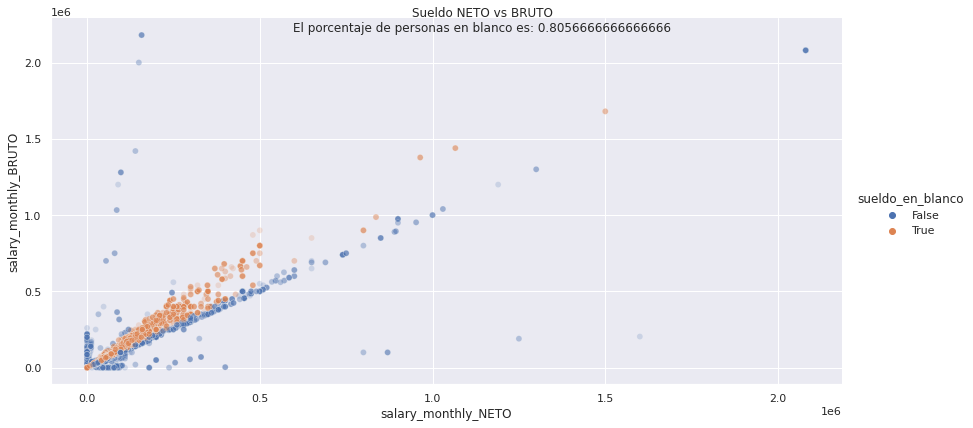

In [12]:
total_en_blanco = len(df_lang[df_lang['sueldo_en_blanco']])
procentaje_en_blanco = total_en_blanco / len(df_lang)

ax = seaborn.pairplot(
    data=df_lang,
    x_vars=['salary_monthly_NETO'],
    y_vars=['salary_monthly_BRUTO'],
    hue='sueldo_en_blanco',
    aspect=2,
    height=6,
    plot_kws=dict(alpha=0.2)
)
t = ax.fig.suptitle(f"Sueldo NETO vs BRUTO\nEl porcentaje de personas en blanco es: {procentaje_en_blanco}")

A continuación, procedemos a filtrar nuestro data set para quedarnos con lo que consideramos "mejores salarios". Vamos a eliminar aquellos encuestados que no programan y a aquellos que dejaron un espacio vacío y respondieron "no" en lenguaje de programación. Luego uniremos las respuestas pl/sql con sql, ya que hacen referencia a un mismo lenguaje.

In [16]:
# Elimino del df aquellas personas que no programan
df_filter = df_lang[df_lang.cured_programming_languages.apply(lambda ele: ele != ["ninguno"])]
df_filter = df_filter[df_filter.programming_language != "no"]

# Elimino las filas que presentan un espacio vacio en lenguaje de programacion
df_filter.programming_language = df_filter.programming_language.apply(lambda ele: "".join(ele.split()))
df_filter = df_filter[df_filter.programming_language != ""]

# Unifico lenguajes
df_filter.programming_language = df_filter.programming_language.replace("pl/sql", "sql").replace('css', 'html')

# Nos quedamos con los que tiene un sueldo en blanco
df_filter = df_filter[df_filter.sueldo_en_blanco]

# Hay encuestados que a pesar de haber puesto bien la relacion entre sueldo neto y bruto,
# se olvido de ponerlo en miles. Agregamos ceros a esos valores.
def agrego_los_miles(sueldo):
  if sueldo > 1000:
    return sueldo
  else:
    return sueldo * 1000 

df_filter.salary_monthly_NETO = df_filter.salary_monthly_NETO.apply(agrego_los_miles)

# Nos quedamos con los langs que tiene un conteo mayor a 10
lenguajes_ordenados_cantidad = df_filter.programming_language.value_counts()
langs_top_10 = lenguajes_ordenados_cantidad[lenguajes_ordenados_cantidad > 10].index.to_list()
df_filter = df_filter[df_filter.programming_language.isin(langs_top_10)]

# Filtramos aquellos programadores que hacen part-time
df_filter = df_filter[df_filter.work_contract_type != 'Part-Time']

df_filter.head()

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_has_bonus,profile_years_experience,work_contract_type,cured_programming_languages,salary_monthly_porcentaje,sueldo_en_blanco
1,html,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]",0.797468,True
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]",0.797468,True
1,python,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]",0.797468,True
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,No,15.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p...",0.784615,True
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,No,15.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p...",0.784615,True


Calculamos el porcentaje de datos que filtramos. 

In [17]:
len(df_lang), len(df_filter), len(df_filter)/len(df_lang)

(18000, 13293, 0.7385)

La existencia o no de un bono es una variable que modifica sensiblemente el salario neto real que gana cada encuestado. Como la información disponible es categórica, se hace la mejor estimación posible del sueldo real incluyendo el bono, tomando al promedio del rango como bono esperado:

 

*   "Menos de un sueldo" = 0.5 sueldos
*   "Un sueldo" = 1 sueldo
*   "De uno a tres sueldos" = 2 sueldos
*   "3+ sueldos" = 3 sueldos
*   "No" = 0 sueldos



In [18]:
def bono_a_sueldo(row):
  if row.salary_has_bonus == "No":
    return row.salary_monthly_NETO
  elif row.salary_has_bonus == "Menos de un sueldo":
    return row.salary_monthly_NETO * ( 1 + 0.5 / 12)
  elif row.salary_has_bonus == "Un sueldo":
    return row.salary_monthly_NETO * ( 1 + 1 / 12)
  elif row.salary_has_bonus == "De uno a tres sueldos":
    return row.salary_monthly_NETO * ( 1 + 2 / 12)
  elif row.salary_has_bonus == "3+ sueldos":
    return row.salary_monthly_NETO * ( 1 + 3 / 12)
  else:
    return row.salary_monthly_NETO

df_filter["sueldo_neto_con_bono"] = df_filter.apply(bono_a_sueldo, axis=1)

In [39]:
langs_to_plot = 15
lenguajes_ordenados_cantidad = df_filter.programming_language.value_counts().index
lenguajes_ordenados_mediana = df_filter.groupby('programming_language').sueldo_neto_con_bono.median().sort_values(ascending=False).index

data = [
  {'by': lenguajes_ordenados_cantidad[:langs_to_plot], 'title': 'Ordenados por cantidad de lenguajes'},
  {'by': lenguajes_ordenados_mediana[:langs_to_plot], 'title': 'Ordenados por mediana de sueldo'}
]

Realizada la limpieza y el filtrado de los datos, se procede a hacer un gráfico de barras para visualizar los lenguajes de programación segun su frecuencia o su mediana

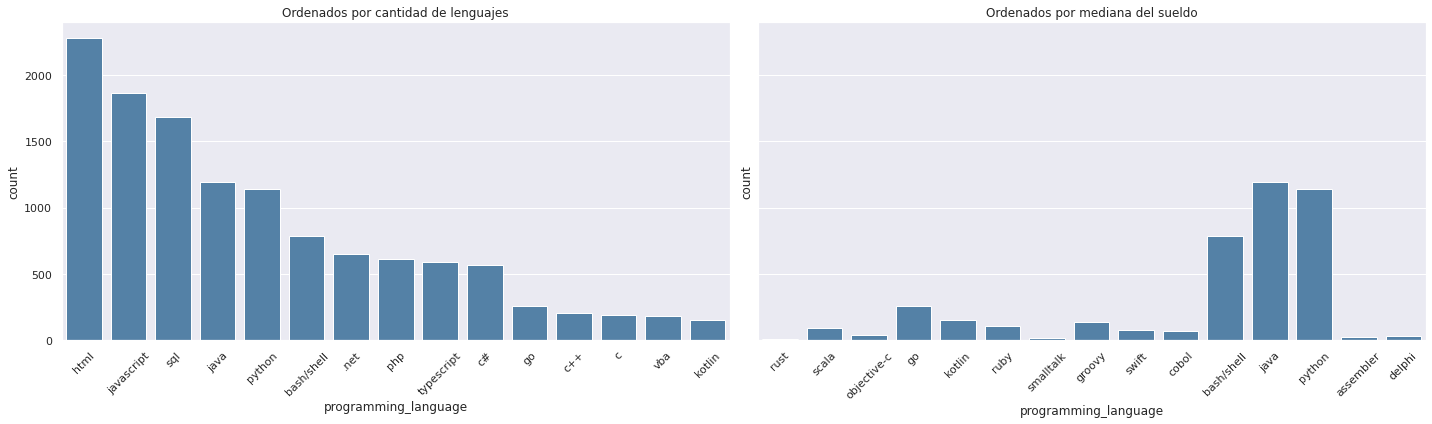

In [66]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 6), sharey=True)

for i, col in enumerate(data):
  chart = seaborn.countplot(
      data=df_filter,
      x='programming_language',
      color='steelblue',
      order = col['by'],
      ax=ax[i]
  )
  labels = ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)
  title = ax[i].set_title(col['title'])

fig.tight_layout()

Distribución de salarios netos en blanco incluyendo el bono

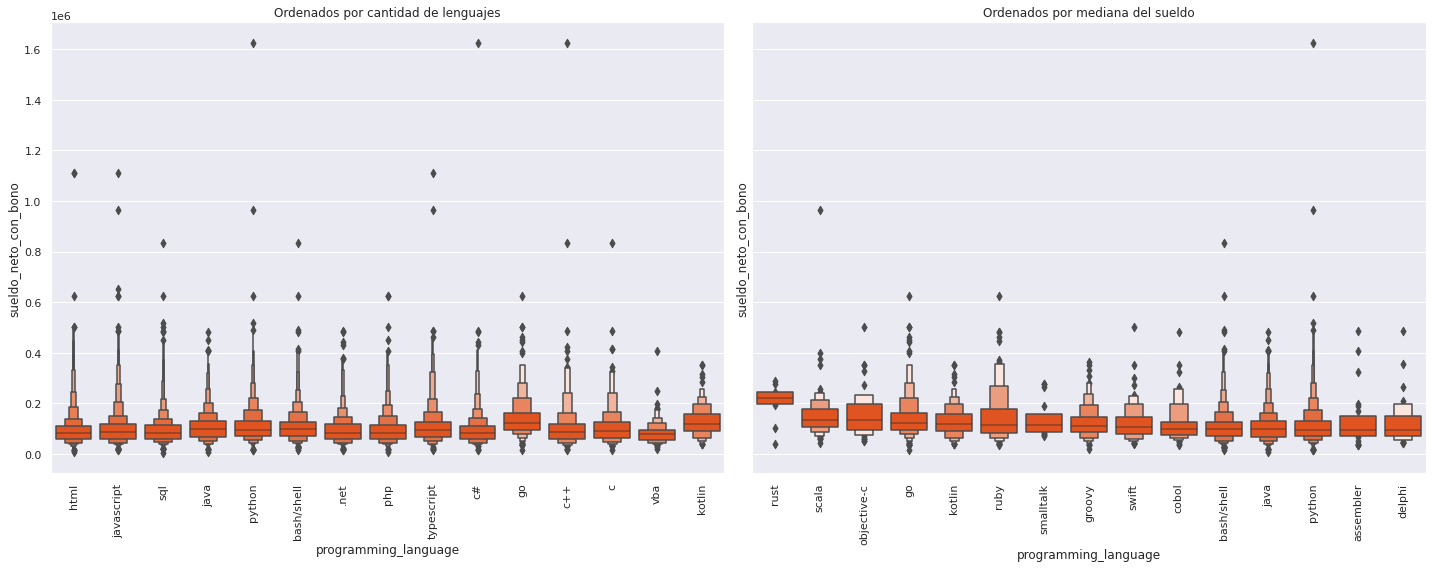

In [72]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8), sharey=True)

for i, col in enumerate(data):
  seaborn.boxenplot(
      data=df_filter,
      x="programming_language",
      y="sueldo_neto_con_bono",
      color='orangered',
      order=col["by"],
      ax=ax[i],
    )
  labels = ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
  title = ax[i].set_title(col['title'])

fig.tight_layout()

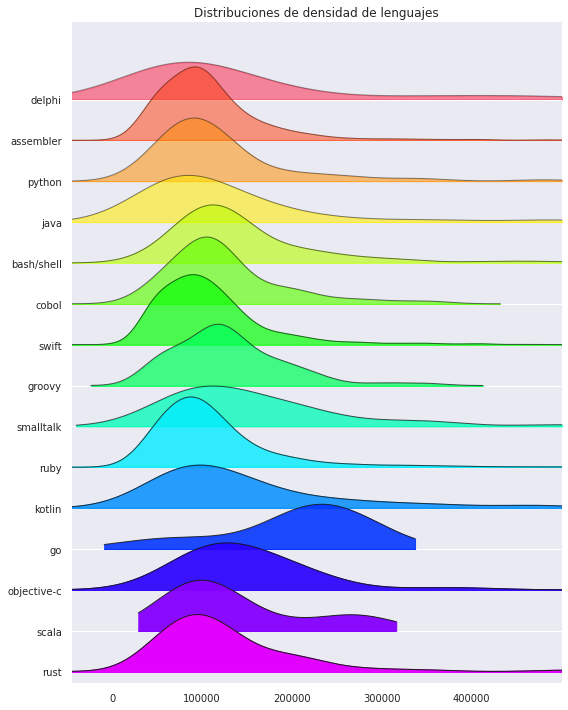

In [ ]:
from matplotlib import cm
%matplotlib inline
labels=lenguajes_ordenados_mediana[-langs_to_plot:]
fig, axes = joypy.joyplot(df_filter[df_filter.programming_language.isin(labels)], by="programming_language", 
                          column="sueldo_neto_con_bono", labels=labels, 
                          range_style='own',
                          x_range=[-45000, 500000],
                          grid="y", linewidth=1, legend=False, figsize=(8,10),
                          title="Distribuciones de densidad de lenguajes", fade=True, colormap=cm.gist_rainbow
                          )


Se puede observar que rust, elixir, scala y objective-c son los lenguajes de mejor distribución de ingresos.

Sin embargo, como el nivel de salario incrementa con la cantidad de años de experiencia, es relevante rehacer el análisis de distribución de mejores salarios por lenguaje, subdividiendo a la población en rangos de cantidad de años de experiencia. 

De este modo, se puede encontrar los lenguajes con mejores salarios según el nivel de antiguedad de cada interesado.

In [76]:
years = 3
bins = [i for i in range(0, 24, years)]
df_filter['years_experience_numerical'] = pd.cut(df_filter.profile_years_experience, bins=bins, labels=bins[:-1])
df_filter.head()

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,salary_has_bonus,profile_years_experience,work_contract_type,cured_programming_languages,salary_monthly_porcentaje,sueldo_en_blanco,sueldo_neto_con_bono,years_experience_numerical
1,html,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]",0.797468,True,65625.0,3
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]",0.797468,True,65625.0,3
1,python,"HTML, Javascript, Python",63000.0,79000.0,Menos de un sueldo,5.0,Full-Time,"[html, javascript, python]",0.797468,True,65625.0,3
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,No,15.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p...",0.784615,True,102000.0,12
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,No,15.0,Full-Time,"[bash/shell, c, css, html, java, javascript, p...",0.784615,True,102000.0,12


Elaboramos un grafico de linea con las medianas de los salarios de los 10 lenguajes mas utilizados (fig. 1) y de los 10 con mayor mediana (fig. 2) segun la cantidad de años de experiencia (rangos de 3 años). 

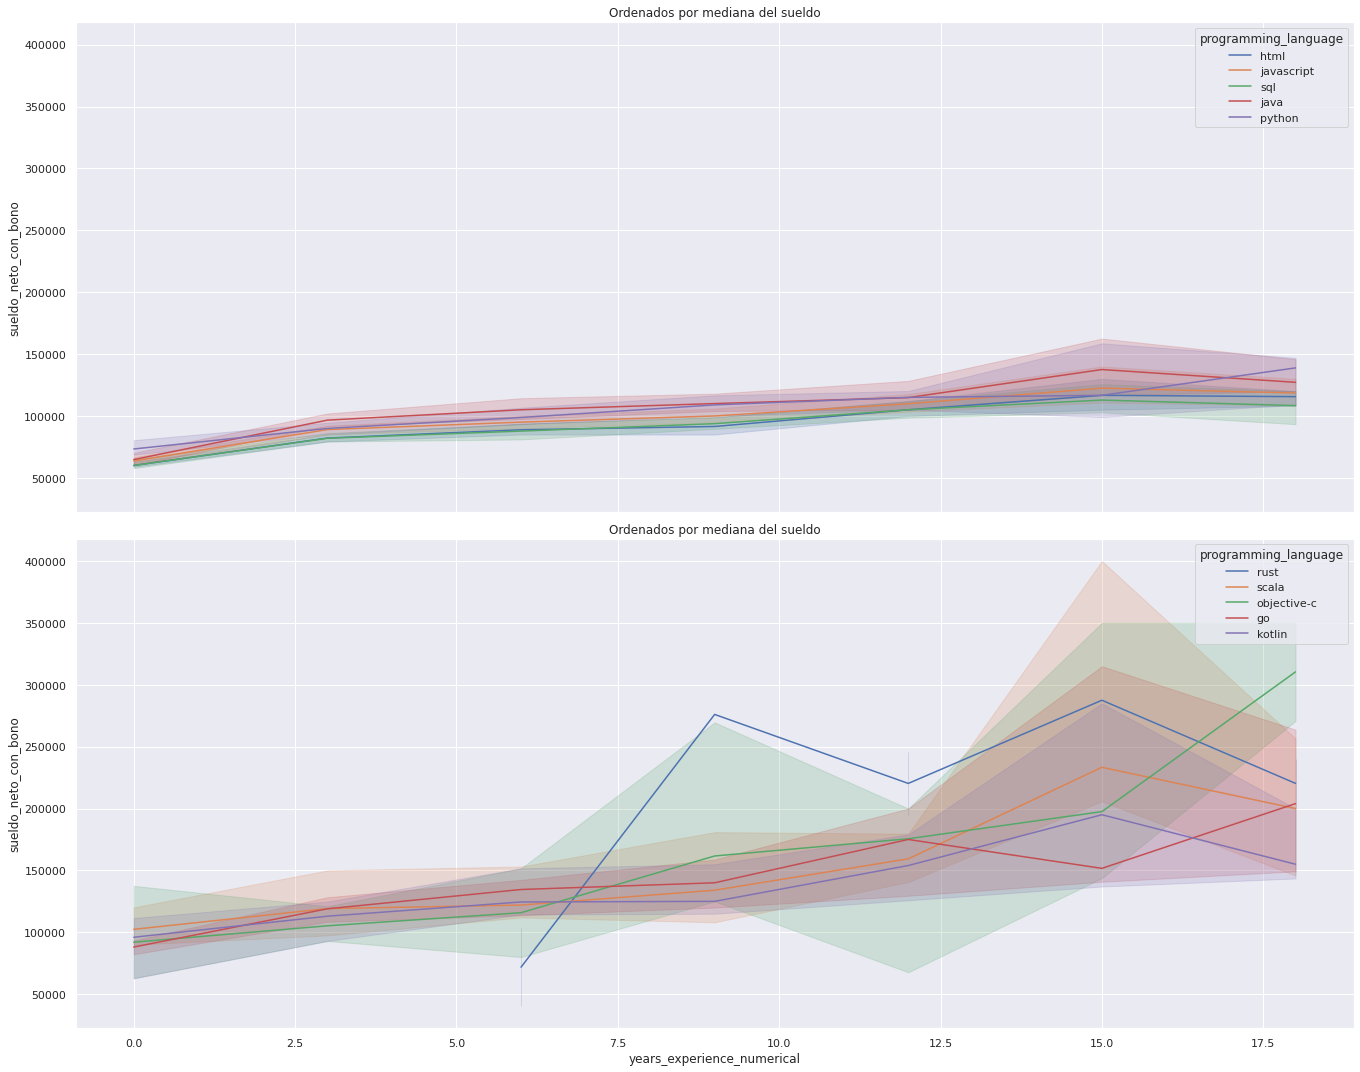

In [81]:
fig, ax = plt.subplots(nrows=2, figsize=(19,15), sharex=True, sharey=True)

for i, row in enumerate(data):
  seaborn.lineplot( 
    data=df_filter,
    x='years_experience_numerical',
    y='sueldo_neto_con_bono',
    estimator=numpy.median,
    hue='programming_language',
    hue_order=row["by"][:5],
    ax=ax[i]
  )
  title = ax[i].set_title(col['title'])

fig.tight_layout()

['assembler', 'typescript', 'dart', 'smalltalk', 'r', 'bash/shell', 'python', 'ruby', 'groovy', 'powershell', 'swift', 'go', 'objective-c', 'kotlin', 'scala']


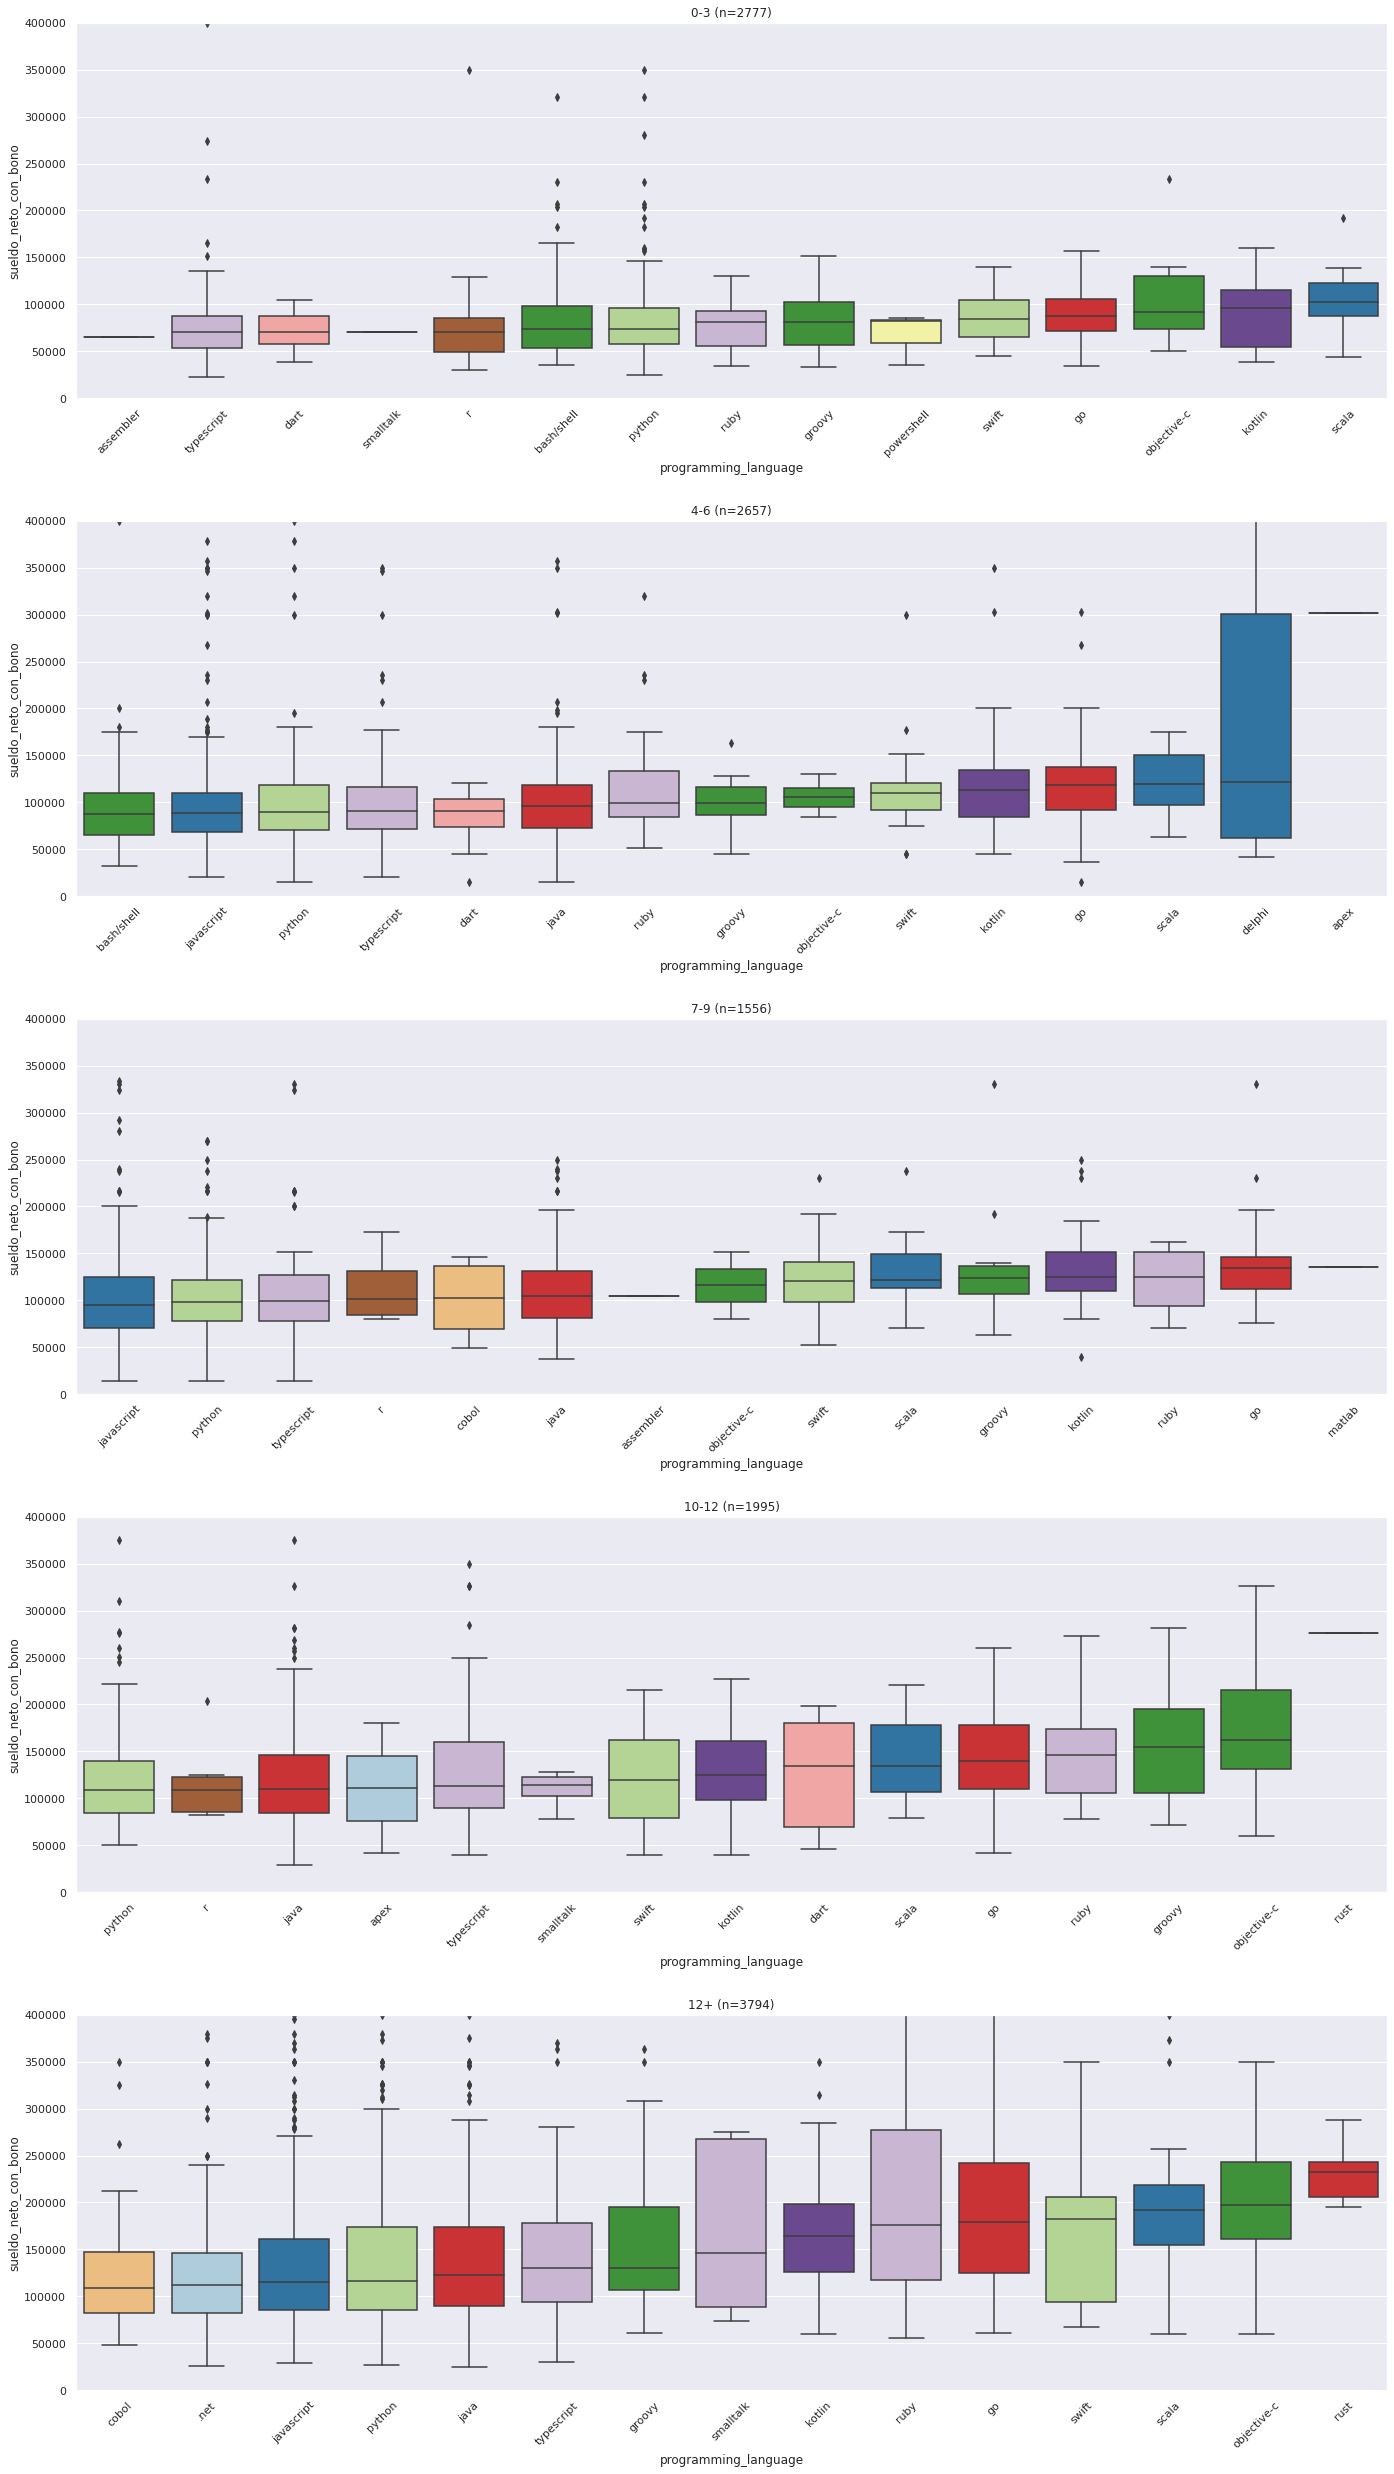

In [ ]:
bins = [0,3,6,9,12,100]
labels = ['0-3', '4-6', '7-9', '10-12', '12+']
df_filter['years_experience_binned'] = pd.cut(df_filter['profile_years_experience'], bins=bins, labels=labels)
print(df_filter[df_filter['years_experience_binned'] == '0-3'].groupby('programming_language').sueldo_neto_con_bono.median().sort_values().index.tolist()[-langs_to_plot:])
fig, axes = plt.subplots(len(labels),1, sharey=True, figsize=(20,35))
color_labels = df_filter.programming_language.unique()
# List of colors in the color palettes
rgb_values = seaborn.color_palette("Paired", len(color_labels))
color_map = dict(zip(color_labels, rgb_values))

for bin in labels:
  lang_list = df_filter[df_filter['years_experience_binned'] == bin].groupby('programming_language').sueldo_neto_con_bono.median().sort_values().index.tolist()[-langs_to_plot:]
  seaborn.boxplot(data=df_filter[df_filter['years_experience_binned'] == bin], 
                  x='programming_language', y='sueldo_neto_con_bono', 
                  ax=axes[labels.index(bin)], 
                  palette=[color_map[clr] for clr in lang_list],
                  order=lang_list)
  axes[labels.index(bin)].set_title(bin + ' (n={0})'.format(len(df_filter[df_filter['years_experience_binned'] == bin])))
  axes[labels.index(bin)].ticklabel_format(style='plain', axis='y')
  plt.setp(axes[labels.index(bin)].xaxis.get_majorticklabels(), rotation=45)
  # axes[labels.index(bin)].set_xticks(rotation=45)
  plt.ylim(0,400000)
fig.tight_layout(pad=3.0)


conclusiones> tendencia con los a;os 
los 10 de mayor mediana 
rust
